In [1]:
from pettingzoo.mpe import simple_tag_v3
env = simple_tag_v3.env(render_mode='human')

env.reset()
for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()

    if termination or truncation:
        action = None
    else:
        action = env.action_space(agent).sample() # this is where you would insert your policy

    env.step(action)
env.close()

In [5]:
env.

<bound method BaseWrapper.observation_space of <pettingzoo.utils.wrappers.order_enforcing.OrderEnforcingWrapper object at 0x000002BDE34CA4D0>>

In [2]:
from tianshou.data import Collector
from tianshou.env import DummyVectorEnv, PettingZooEnv
from tianshou.policy import MultiAgentPolicyManager, RandomPolicy

from pettingzoo.classic import rps_v2

if __name__ == "__main__":
    # Step 1: Load the PettingZoo environment
    env = rps_v2.env(render_mode="human")

    # Step 2: Wrap the environment for Tianshou interfacing
    env = PettingZooEnv(env)

    # Step 3: Define policies for each agent
    policies = MultiAgentPolicyManager([RandomPolicy(), RandomPolicy()], env)

    # Step 4: Convert the env to vector format
    env = DummyVectorEnv([lambda: env])

    # Step 5: Construct the Collector, which interfaces the policies with the vectorised environment
    collector = Collector(policies, env)

    # Step 6: Execute the environment with the agents playing for 1 episode, and render a frame every 0.1 seconds
    result = collector.collect(n_episode=10, render=0.1)

In [5]:
policies.observation_space

#### 2）算法集成

| 分类  | 序号  | 算法  | 论文  | 备注  |
|---|---|---|---|---|
| 基于策略梯度的深度强化学习算法  |  1 | PG，Policy Gradient（策略梯度）   |  Policy gradient methods for reinforcement learning with function approximation<sup>[Richard S. Sutton, David A. McAllester, Satinder P. Singh, and Yishay Mansour. Policy gradient methods for reinforcement learning with function approximation. In Advances in Neural Information Processing Systems 12, [NIPS Conference, Denver, Colorado, USA, November 29 - December 4, 1999], 1057–1063. 1999. URL: http://papers.nips.cc/paper/1713-policy-gradient-methods-for-reinforcement-learning-with-function-approximation.]</sup> |   |
|   | 2  | A2C，Advantage Actor-Critic（优势动作评价）  | Asynchronous Methods for Deep Reinforcement Learning<sup>[Volodymyr Mnih, Adrià Puigdomènech Badia, Mehdi Mirza, Alex Graves, Timothy P. Lillicrap, Tim Harley, David Silver, and Koray Kavukcuoglu. Asynchronous methods for deep reinforcement learning. In Proceedings of the 33nd International Conference on Machine Learning, ICML 2016, New York City, NY, USA, June 19-24, 2016, 1928–1937. 2016. URL: http://proceedings.mlr.press/v48/mniha16.html.]</sup>  |   |
|   | 3  | PPO，Proximal Policy Optimization（近端策略优化）  | Proximal policy optimization algorithms<sup>[John Schulman, Filip Wolski, Prafulla Dhariwal, Alec Radford, and Oleg Klimov. Proximal policy optimization algorithms. CoRR, 2017. URL: http://arxiv.org/abs/1707.06347, arXiv:1707.06347.]</sup>   |   |
|   | 4  | GAE，Generalized Advantage Estimator（广义优势函数估计器）  | High-dimensional continuous control using generalized advantage estimation<sup>[John Schulman, Philipp Moritz, Sergey Levine, Michael I. Jordan, and Pieter Abbeel. High-dimensional continuous control using generalized advantage estimation. In 4th International Conference on Learning Representations, ICLR 2016, San Juan, Puerto Rico, May 2-4, 2016, Conference Track Proceedings. 2016. URL: http://arxiv.org/abs/1506.02438.]</sup>  |   |
|   | 5  |PPG，Phasic Policy Gradient   | Phasic Policy Gradient<sup>[Karl Cobbe, Jacob Hilton, Oleg Klimov, & John Schulman. (2020). Phasic Policy Gradient.]</sup>  |   |
| 基于Q价值函数的深度强化学习算法  | 6  | DQN，Deep Q Network（深度Q网络）  |  Human-level control through deep reinforcement learning<sup>[Volodymyr Mnih, Koray Kavukcuoglu, David Silver, Andrei A. Rusu, Joel Veness, Marc G. Bellemare, Alex Graves, Martin A. Riedmiller, Andreas Fidjeland, Georg Ostrovski, Stig Petersen, Charles Beattie, Amir Sadik, Ioannis Antonoglou, Helen King, Dharshan Kumaran, Daan Wierstra, Shane Legg, and Demis Hassabis. Human-level control through deep reinforcement learning. Nature, 518(7540):529–533, 2015. URL: https://doi.org/10.1038/nature14236, doi:10.1038/nature14236.]</sup>  |   |
|   | 7  | DDQN，Double DQN（双网络深度Q学习）  | Deep reinforcement learning with double q-learning<sup>[Hado van Hasselt, Arthur Guez, and David Silver. Deep reinforcement learning with double q-learning. In Proceedings of the Thirtieth AAAI Conference on Artificial Intelligence, February 12-17, 2016, Phoenix, Arizona, USA, 2094–2100. 2016. URL: http://www.aaai.org/ocs/index.php/AAAI/AAAI16/paper/view/12389.]</sup>  |   |
|   |  8 | PER，Prioritized Experience Replay（优先级经验重放）  | Prioritized experience replay<sup>[Tom Schaul, John Quan, Ioannis Antonoglou, and David Silver. Prioritized experience replay. In 4th International Conference on Learning Representations, ICLR 2016, San Juan, Puerto Rico, May 2-4, 2016, Conference Track Proceedings. 2016. URL: http://arxiv.org/abs/1511.05952.]</sup>  |   |
|   | 9  | C51，Categorical DQN  |  A Distributional Perspective on Reinforcement Learning<sup>[Marc G. Bellemare, Will Dabney, & Rémi Munos. (2017). A Distributional Perspective on Reinforcement Learning.]</sup> |   |
| 综合Q价值函数与策略梯度的深度强化学习算法  |  10 | DDPG，Deep Deterministic Policy Gradient（深度确定性策略梯度）  | Continuous control with deep reinforcement learning<sup>[Timothy P. Lillicrap, Jonathan J. Hunt, Alexander Pritzel, Nicolas Heess, Tom Erez, Yuval Tassa, David Silver, and Daan Wierstra. Continuous control with deep reinforcement learning. In 4th International Conference on Learning Representations, ICLR 2016, San Juan, Puerto Rico, May 2-4, 2016, Conference Track Proceedings. 2016. URL: http://arxiv.org/abs/1509.02971.]</sup>  |   |
|   | 11  | TD3，Twin Delayed DDPG（双延迟深度确定性策略梯度）  | Addressing function approximation error in actor-critic methods<sup>[Scott Fujimoto, Herke van Hoof, and David Meger. Addressing function approximation error in actor-critic methods. In Proceedings of the 35th International Conference on Machine Learning, ICML 2018, Stockholmsmässan, Stockholm, Sweden, July 10-15, 2018, 1582–1591. 2018. URL: http://proceedings.mlr.press/v80/fujimoto18a.html.]</sup>  |   |
|   | 12  | SAC，Soft Actor-Critic（软动作评价）  | Soft actor-critic algorithms and applications<sup>[Tuomas Haarnoja, Aurick Zhou, Kristian Hartikainen, George Tucker, Sehoon Ha, Jie Tan, Vikash Kumar, Henry Zhu, Abhishek Gupta, Pieter Abbeel, and Sergey Levine. Soft actor-critic algorithms and applications. CoRR, 2018. URL: http://arxiv.org/abs/1812.05905, arXiv:1812.05905.]</sup>  |   |
|  其它 | 13  | RND，Random Network Distillation  | Exploration by Random Network Distillation<sup>[Yuri Burda, Harrison Edwards, Amos Storkey, & Oleg Klimov. (2018). Exploration by Random Network Distillation.]</sup>  |   |
|   |  14 |   Qdagger |  Reincarnating Reinforcement Learning: Reusing Prior Computation to Accelerate Progress<sup>[Rishabh Agarwal, Max Schwarzer, Pablo Samuel Castro, Aaron Courville, & Marc G. Bellemare. (2022). Reincarnating Reinforcement Learning: Reusing Prior Computation to Accelerate Progress.]</sup> |   |
|   |   |   |   |   |

In [1]:
%load_ext autoreload 
%autoreload 2 
import usda.mpe_realworld as usda_mpe

In [2]:
from usda.mpe_realworld.mpe import simple_adversary_v3

env = simple_adversary_v3.env(render_mode="human")
env.reset(seed=42)

for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()
    #print(observation, reward, termination, truncation, info)
    if termination or truncation:
        action = None
    else:
        # this is where you would insert your policy
        action = env.action_space(agent).sample()

    env.step(action)
env.close()

print(observation, reward, termination, truncation, info)

[-1.6481416  -1.5541939  -1.6481416  -1.5541939  -2.3194983  -1.0688251
 -1.6181216   0.00328362 -1.2314322  -1.4534523 ] 1.1290528980111827 False True {}


In [ ]:
usda_mpe.AECEnv

In [6]:
%load_ext autoreload 
%autoreload 2 
from usda.mpe_realworld.mpe import simple_realworld

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

In [1]:
%load_ext autoreload 
%autoreload 2 

from usda.mpe_realworld.mpe import simple_push_v3

import supersuit as ss
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
import pygame

In [2]:
env = simple_push_v3.env(render_mode="human")
env.reset()

In [3]:
env.reset() 
env = ss.pettingzoo_env_to_vec_env_v1(env)
#env = ss.concat_vec_envs_v1(env, 8, num_cpus=num_cpus, base_class="stable_baselines3")

AssertionError: pettingzoo_env_to_vec_env takes in a pettingzoo ParallelEnv. Can create a parallel_env with pistonball.parallel_env() or convert it from an AEC env with `from pettingzoo.utils.conversions import aec_to_parallel; aec_to_parallel(env)``

In [4]:
from pettingzoo.sisl import waterworld_v4

In [5]:
env = waterworld_v4.parallel_env()
env = ss.pettingzoo_env_to_vec_env_v1(env)

In [ ]:
t4b.graph.graph.boxplot_custom

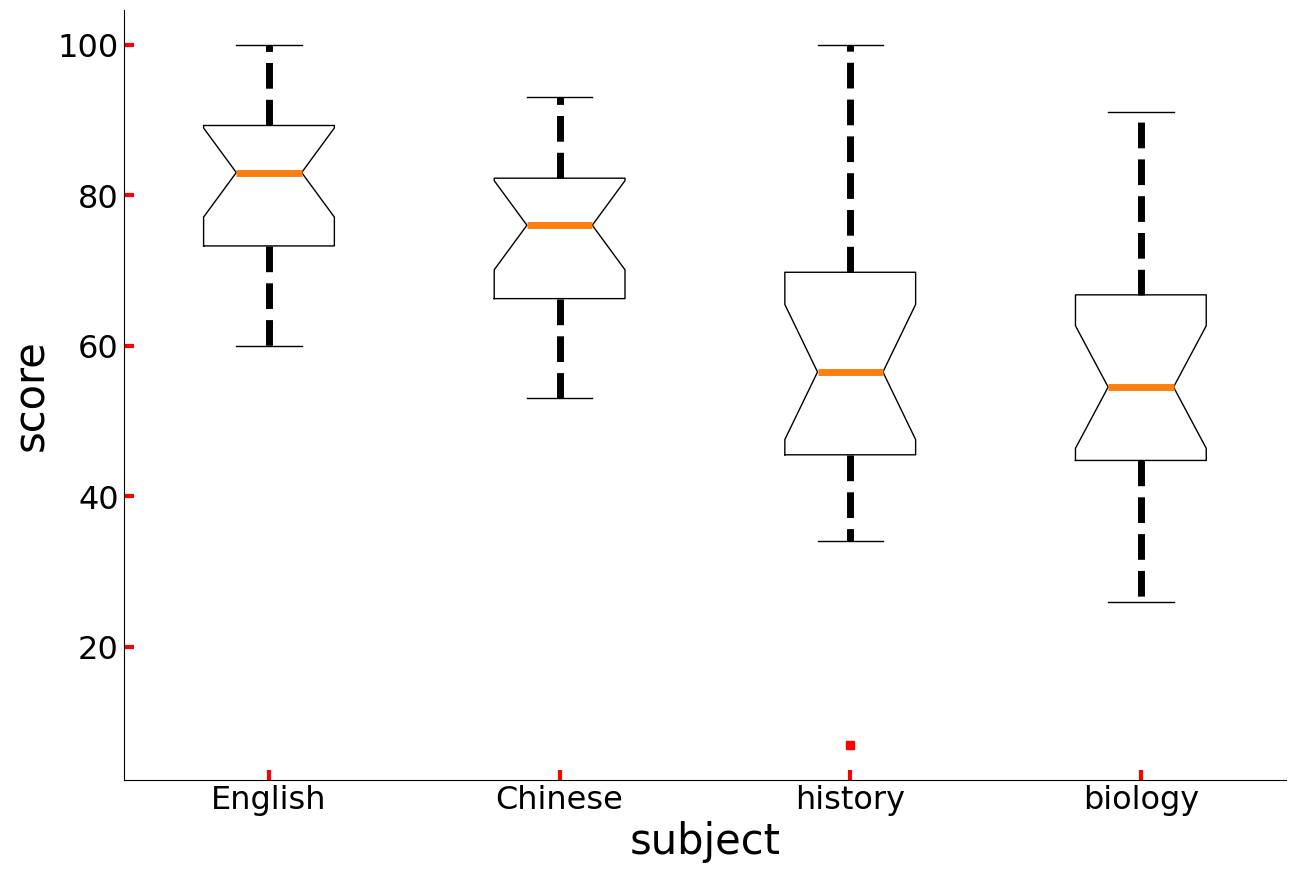

In [5]:
import toolkit4beginner as t4b

from toolkit4beginner.graph import graph

test_score_lst_dic={'English': [90, 81, 73, 97, 85, 60, 74, 64, 72, 67, 87, 78, 85, 96, 77, 100, 92, 86], 
                    'Chinese': [71, 90, 79, 70, 67, 66, 60, 83, 57, 85, 93, 89, 78, 74, 65, 78, 53, 80], 
                    'history': [73, 61, 74, 47, 49, 87, 69, 65, 36, 7, 53, 100, 57, 45, 56, 34, 37, 70], 
                    'biology': [59, 73, 47, 38, 63, 56, 75, 53, 80, 50, 41, 62, 44, 26, 91, 35, 53, 68]}
_=t4b.graph.graph.boxplot_custom(test_score_lst_dic,
               figsize=(15,10),
               fontsize=23,
               frameOn=['bottom','left'],
               xlabel='subject',
               ylabel='score',
               labelsize='30',
               tick_color='r',
               notch=1,
               sym='rs',
               whisker_linestyle='--',
               whisker_linewidth=5,
               median_linewidth=5
              )

In [7]:
import functools
def repeat(num_times):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            for _ in range(num_times):
                value = func(*args, **kwargs)
            return value
        return wrapper_repeat
    return decorator_repeat

@repeat(num_times=3)
def greet(name):
    print(f"Hello {name}")
    
greet("Galaxy")

Hello Galaxy
Hello Galaxy
Hello Galaxy


In [12]:
import functools

def decorator_repeat(func,n):
    @functools.wraps(func)    
    def wrapper_repeat(*args, **kwargs):
        for _ in range(n):
            value = func(*args, **kwargs)
        return value
    return wrapper_repeat


@decorator_repeat(4)
def greet(name):
    print(f"Hello {name}")
    
greet("Galaxy")

TypeError: decorator_repeat() missing 1 required positional argument: 'n'

In [23]:
from usda.migrated_project.pix2pix import A2B
from usda.migrated_project.pix2pix import sketch_A2B
import usda.imgs_process as usda_imgs
from yacs.config import CfgNode as CN

In [24]:
from PIL import EpsImagePlugin
EpsImagePlugin.gs_windows_binary =r'C:\Program Files\gs\gs10.01.1\bin\gswin64c'

In [25]:
app=sketch_A2B.Sketch_A2B()
app.mainloop()

initialize network with normal
initialize network with normal
initialize network with normal


In [27]:
import usda_dashboard
usda_dashboard.dash_usda_datasetidx()

---

In [161]:
%load_ext autoreload 
%autoreload 2 
import usda.data_process as usda_dp
import usda.geodata_process_opt as usda_geoproces

import osmium as osm
import geopandas as gpd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
piazza_di_san_fn='../data/piazza_navona.osm'

osm_handler=usda_dp.osmHandler() 
osm_handler.apply_file(piazza_di_san_fn,locations=True)

In [59]:
epsg_wgs84=4326
osm_columns=['type','geometry','id','version','visible','ts','uid','user','changeet','tagLen','tags']
osm_node_gdf=gpd.GeoDataFrame(osm_handler.osm_node,columns=osm_columns,crs=epsg_wgs84)

In [60]:
osm_node_gdf

type                   geometry           id  version  visible  \
0     node  POINT (12.47228 41.89919)     25388168        6     True   
1     node  POINT (12.47225 41.89980)     25388169        5     True   
2     node  POINT (12.47270 41.89981)     25388170        6     True   
3     node  POINT (12.47275 41.89920)     25388171        5     True   
4     node  POINT (12.46924 41.89913)     25388186        4     True   
...    ...                        ...          ...      ...      ...   
7774  node  POINT (12.47199 41.89682)  11112388706        7     True   
7775  node  POINT (12.47567 41.89674)  11183079186        1     True   
7776  node  POINT (12.46983 41.89700)  11208682951        1     True   
7777  node  POINT (12.46969 41.89703)  11208682952        1     True   
7778  node  POINT (12.47343 41.89723)  11208682953        1     True   

                            ts       uid              user   changeet  tagLen  \
0    2011-09-18 16:47:51+00:00    430115          Emistrac    9334851       0   
1    2011-08-14 00:27:17+00:00    430115          Emistrac    9011017       0   
2    2011-08-14 00:27:17+00:00    430115          Emistrac    9011017       0   
3    2011-02-12 17:52:47+00:00     26139      dieterdreist    7267437       0   
4    2019-11-09 13:56:27+00:00   3860151  Michele Aquilani   76844884       0   
...                        ...       ...               ...        ...     ...   
7774 2023-08-21 19:40:23+00:00  19233464  secondaryhighway  140198197       2   
7775 2023-09-11 11:04:08+00:00  19265664            Fufino  141106022       1   
7776 2023-09-21 18:57:41+00:00   3335899              GBAB  141573751      10   
7777 2023-09-21 18:57:41+00:00   3335899              GBAB  141573751       1   
7778 2023-09-21 18:57:41+00:00   3335899              GBAB  141573751       6   

                                                   tags  
0                                                    {}  
1                                                    {}  
2                                                    {}  
3                                                    {}  
4                                                    {}  
...                                                 ...  
7774  {'amenity': 'restaurant', 'name:ru': 'Mariuccia'}  
7775                      {'amenity': 'drinking_water'}  
7776  {'addr:city': 'Roma', 'addr:housenumber': '74'...  
7777                               {'shop': 'antiques'}  
7778  {'amenity': 'monastery', 'community:gender': '...  

[7779 rows x 11 columns]

In [61]:
osm_node_gdf.tags[len(osm_node_gdf)-1]

{'amenity': 'monastery',
 'community:gender': 'male',
 'contact:website': 'https://scolopi.org',
 'denomination': 'roman_catholic',
 'name': 'Curia generale degli scolopi',
 'religion': 'christian'}

<Axes: >

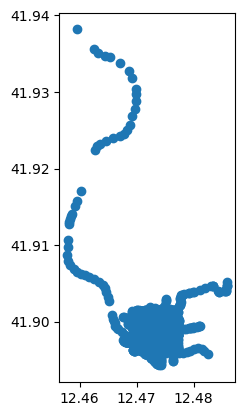

In [62]:
osm_node_gdf.plot()

In [63]:
osm_way_gdf=gpd.GeoDataFrame(osm_handler.osm_way,columns=osm_columns,crs=epsg_wgs84)

<Axes: >

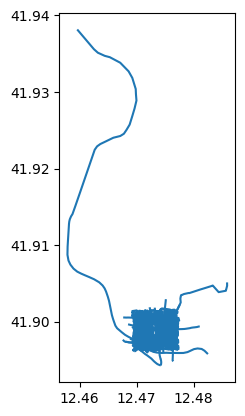

In [64]:
osm_way_gdf.plot()

In [65]:
osm_area_gdf=gpd.GeoDataFrame(osm_handler.osm_area,columns=osm_columns,crs=epsg_wgs84)

In [66]:
osm_area_gdf.tags[0]

{'name': 'Piazza Navona',
 'name:es': 'Plaza Navona',
 'name:it': 'Piazza Navona',
 'name:ko': '나보나 광장',
 'name:ru': 'Площадь Навона',
 'name:zh': '纳沃纳广场',
 'old_name': 'Stadio di Domiziano',
 'place': 'square',
 'tourism': 'attraction',
 'wheelchair': 'yes',
 'wikidata': 'Q463400',
 'wikimedia_commons': 'Category:Piazza Navona (Rome)',
 'wikipedia': 'it:Piazza Navona'}

In [99]:
envelope.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

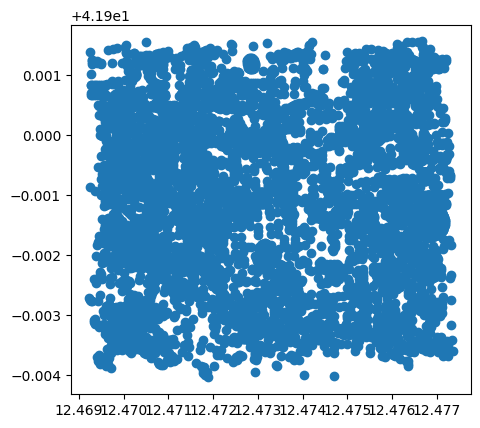

In [102]:
osm_node_gdf_=osm_node_gdf.clip(envelope)
osm_node_gdf_.plot()

In [104]:
from shapely.geometry import LineString, MultiPoint, Polygon

minx, miny, maxx, maxy = osm_area_gdf.geometry.total_bounds
envelope = gpd.GeoDataFrame([[Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx,miny), (minx, miny)])]], columns=['geometry'],crs=osm_area_gdf.crs)

osm_way_gdf_ = osm_way_gdf.clip(envelope)
osm_node_gdf_=osm_node_gdf.clip(envelope)

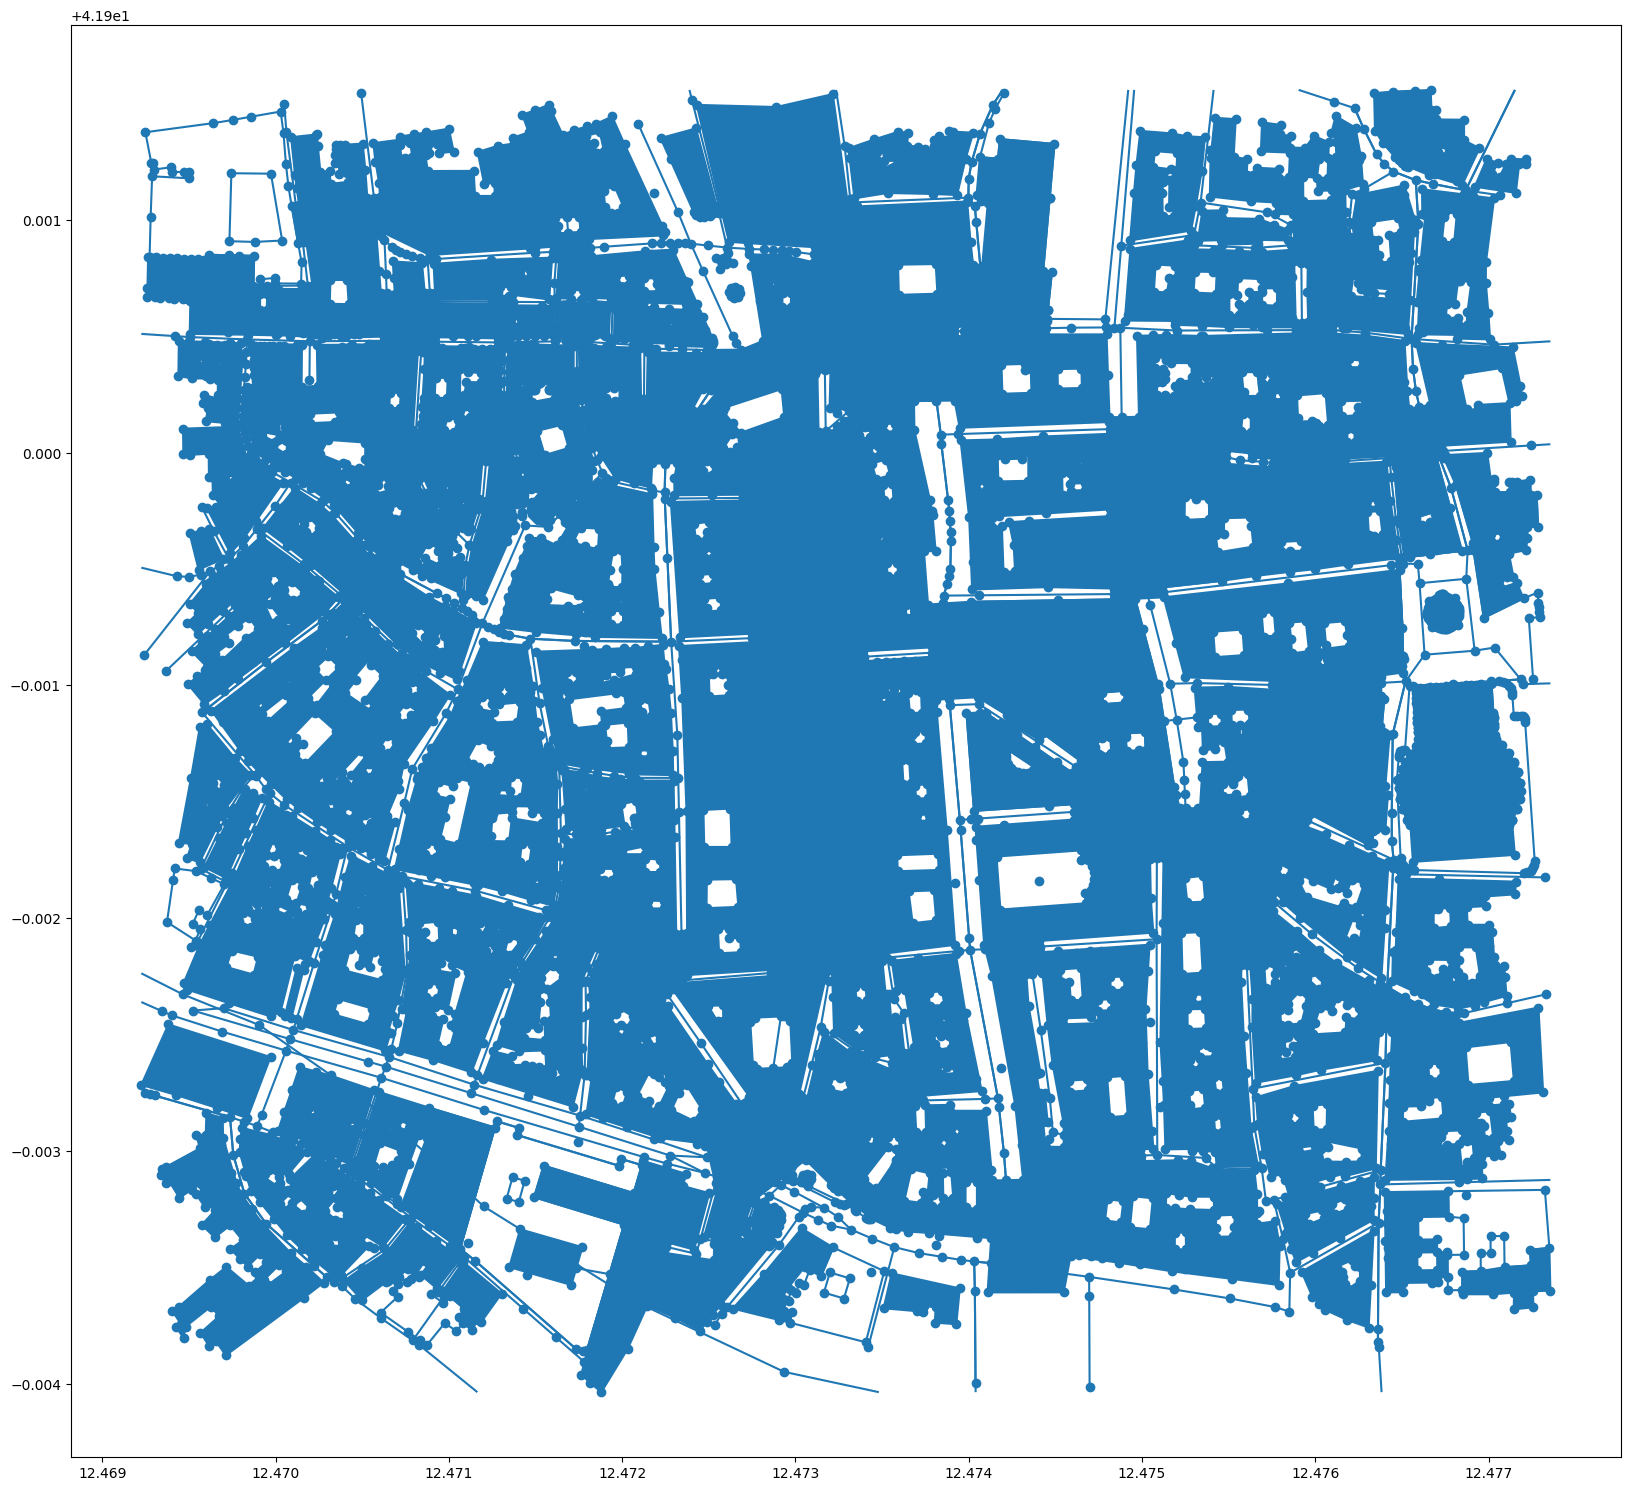

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
osm_area_gdf.plot(ax=ax)
osm_way_gdf_.plot(ax=ax)
osm_node_gdf_.plot(ax=ax)
plt.show()

<Axes: >

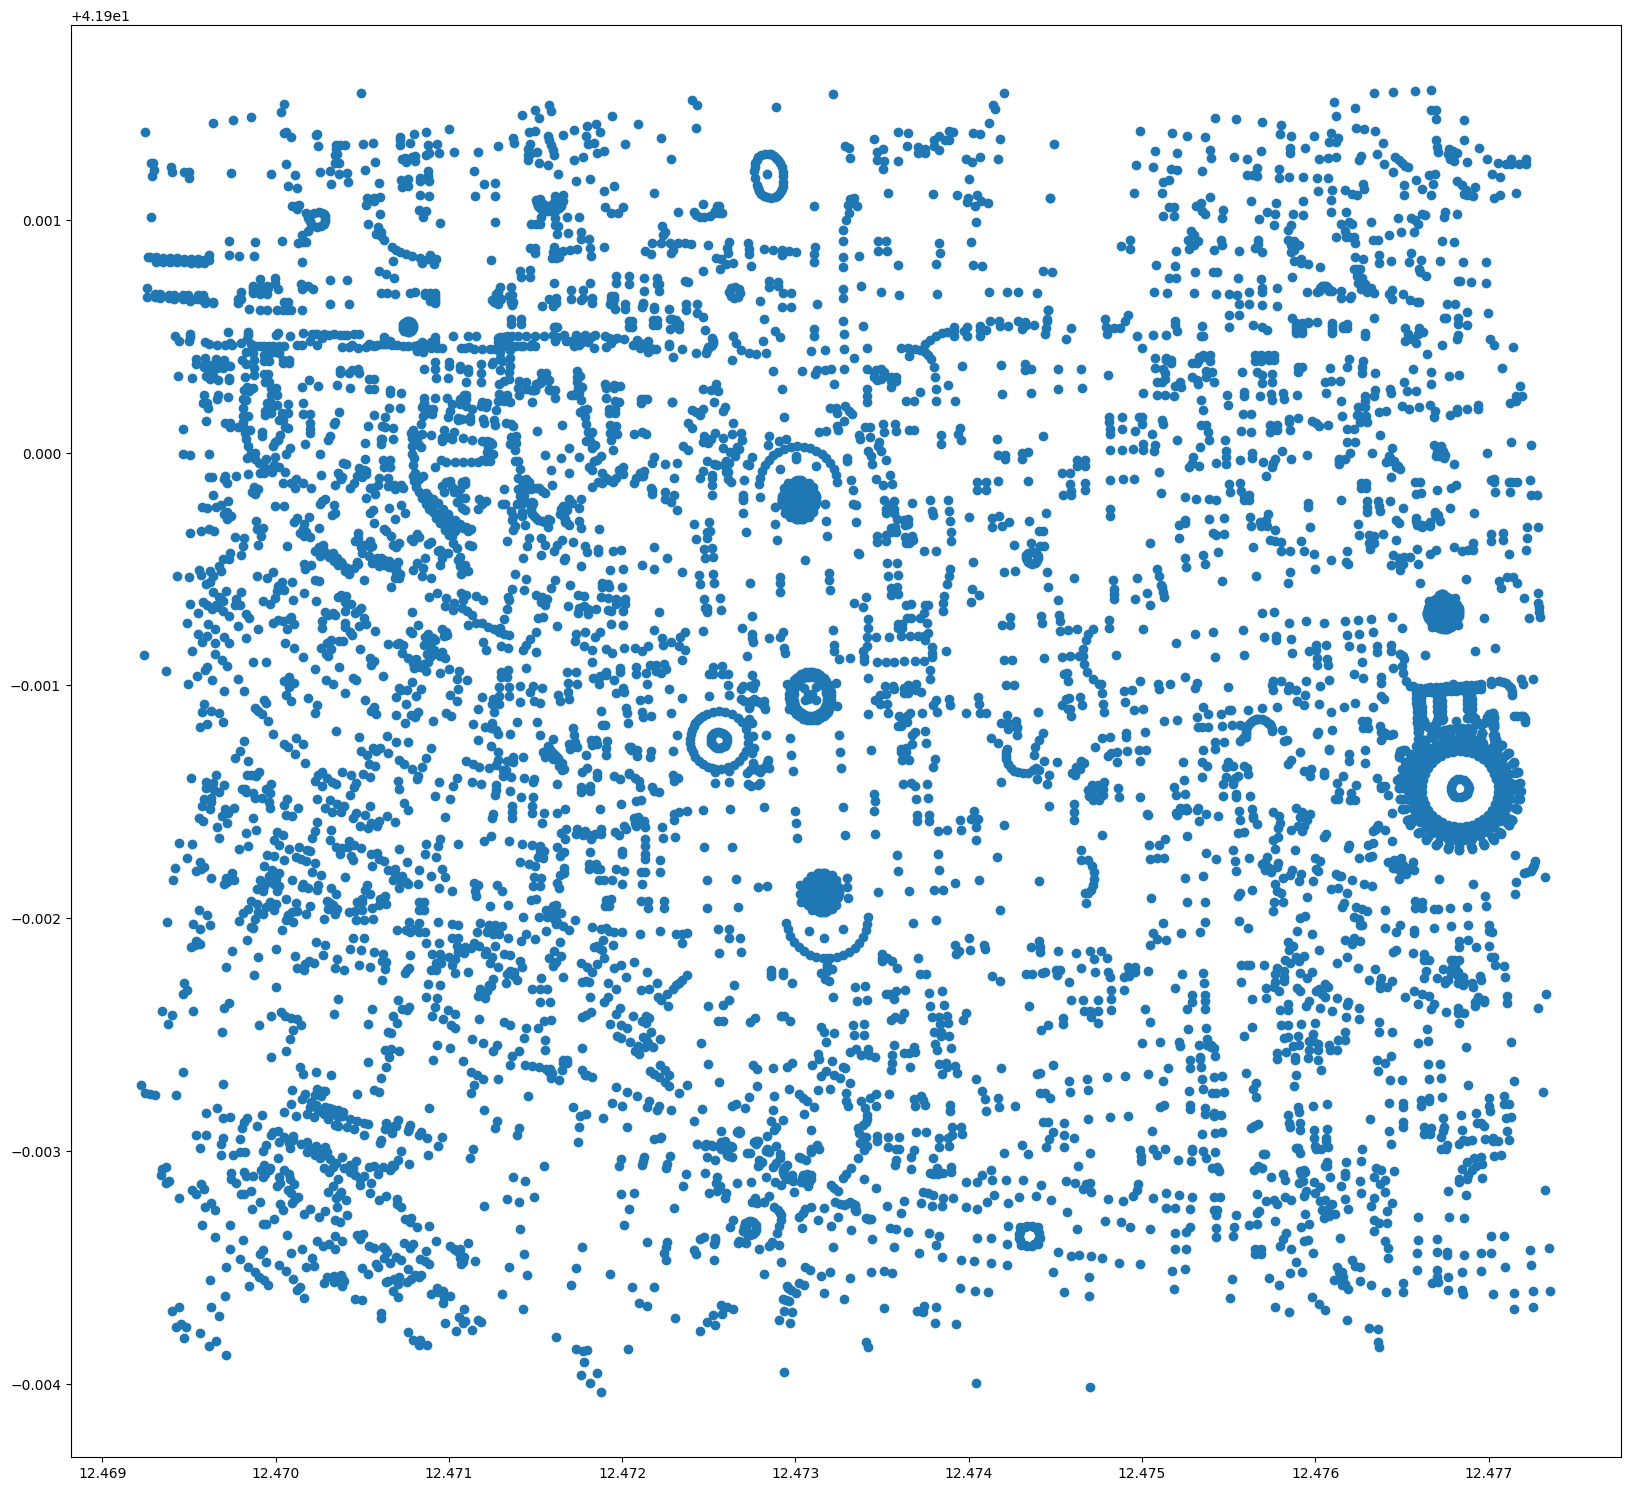

In [69]:
osm_node_gdf_.plot(figsize=(20,20))

<Axes: >

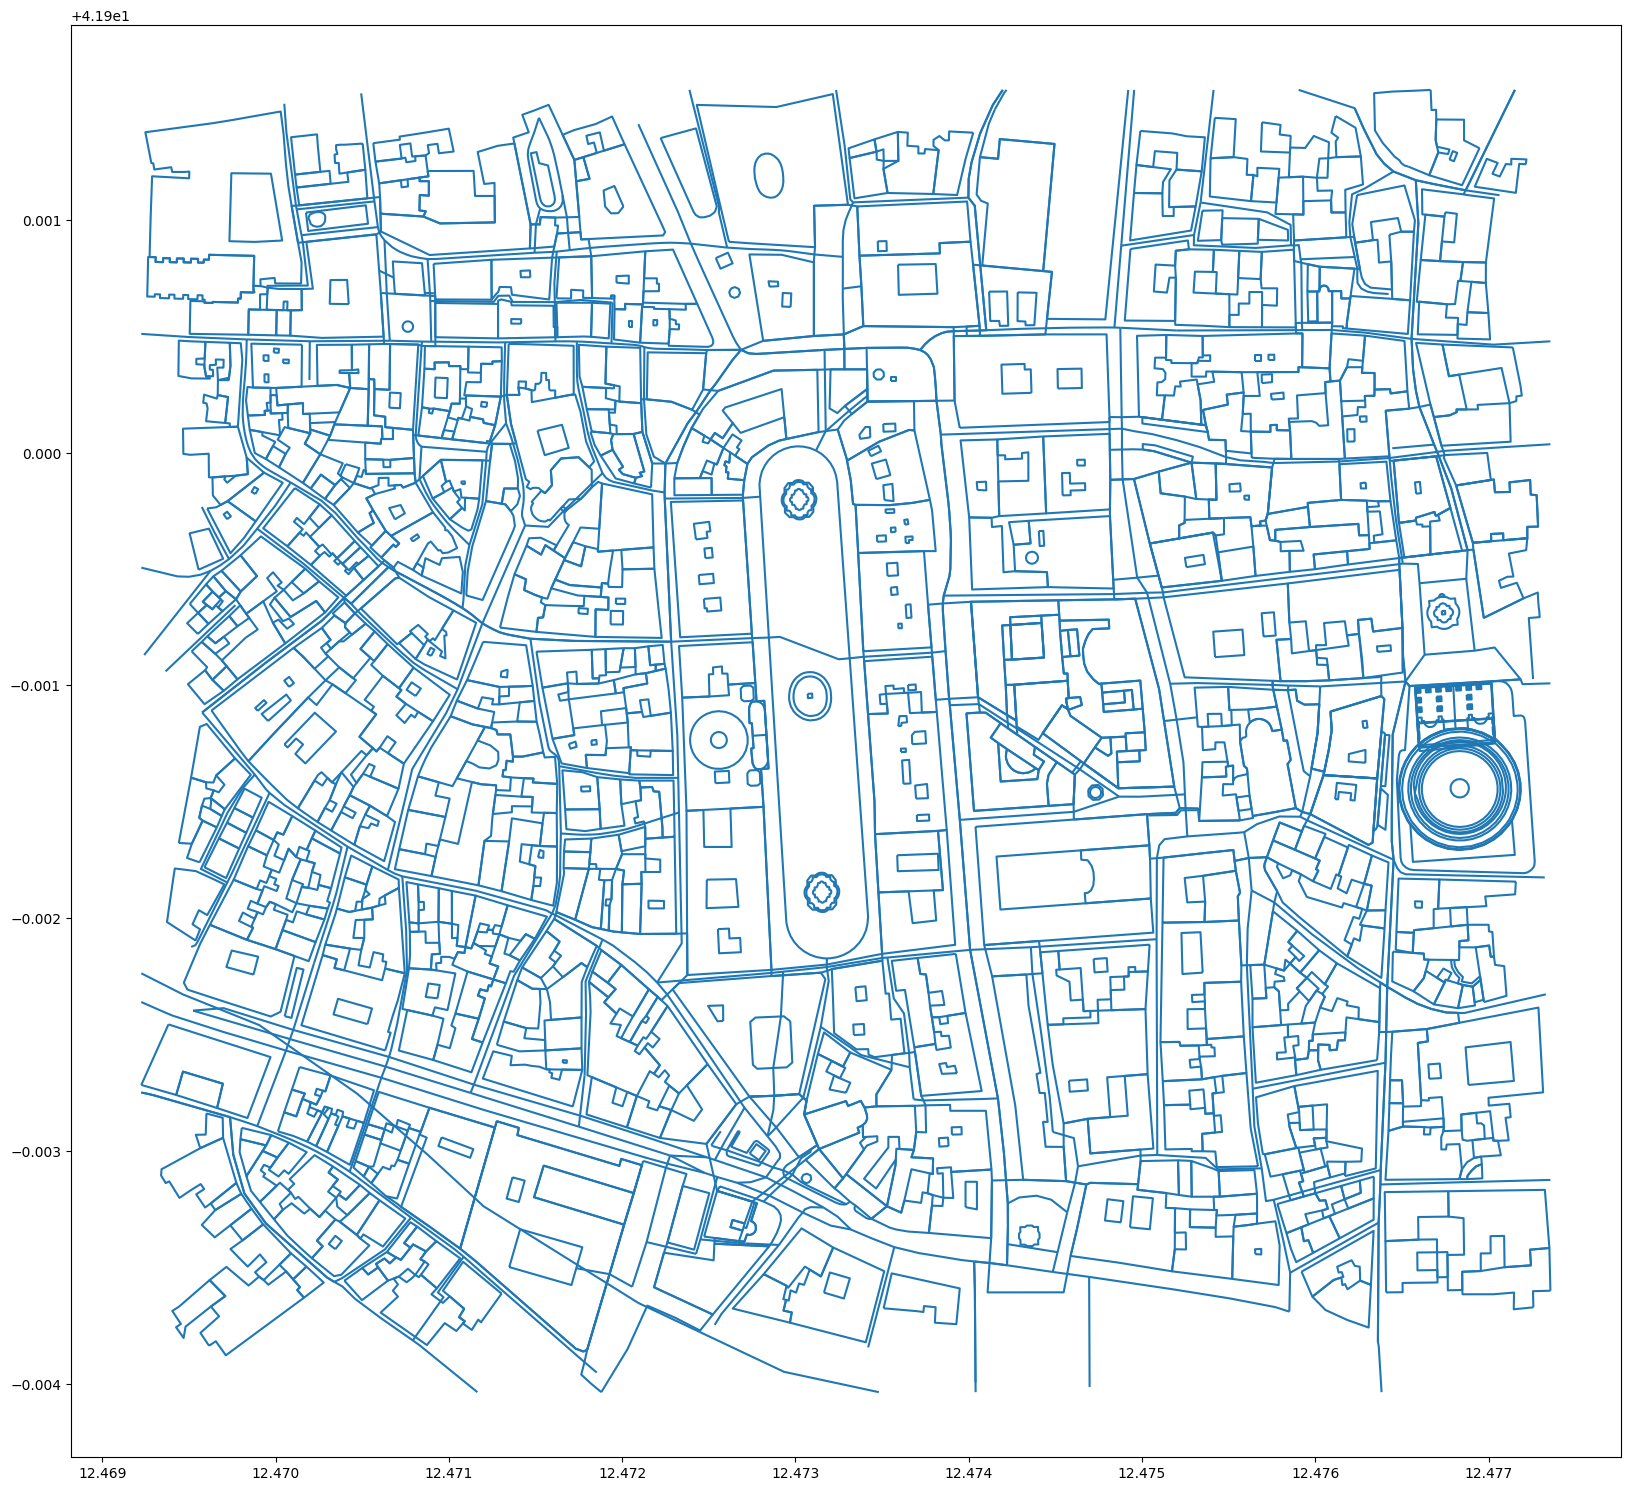

In [70]:
osm_way_gdf_.plot(figsize=(20,20))

<Axes: >

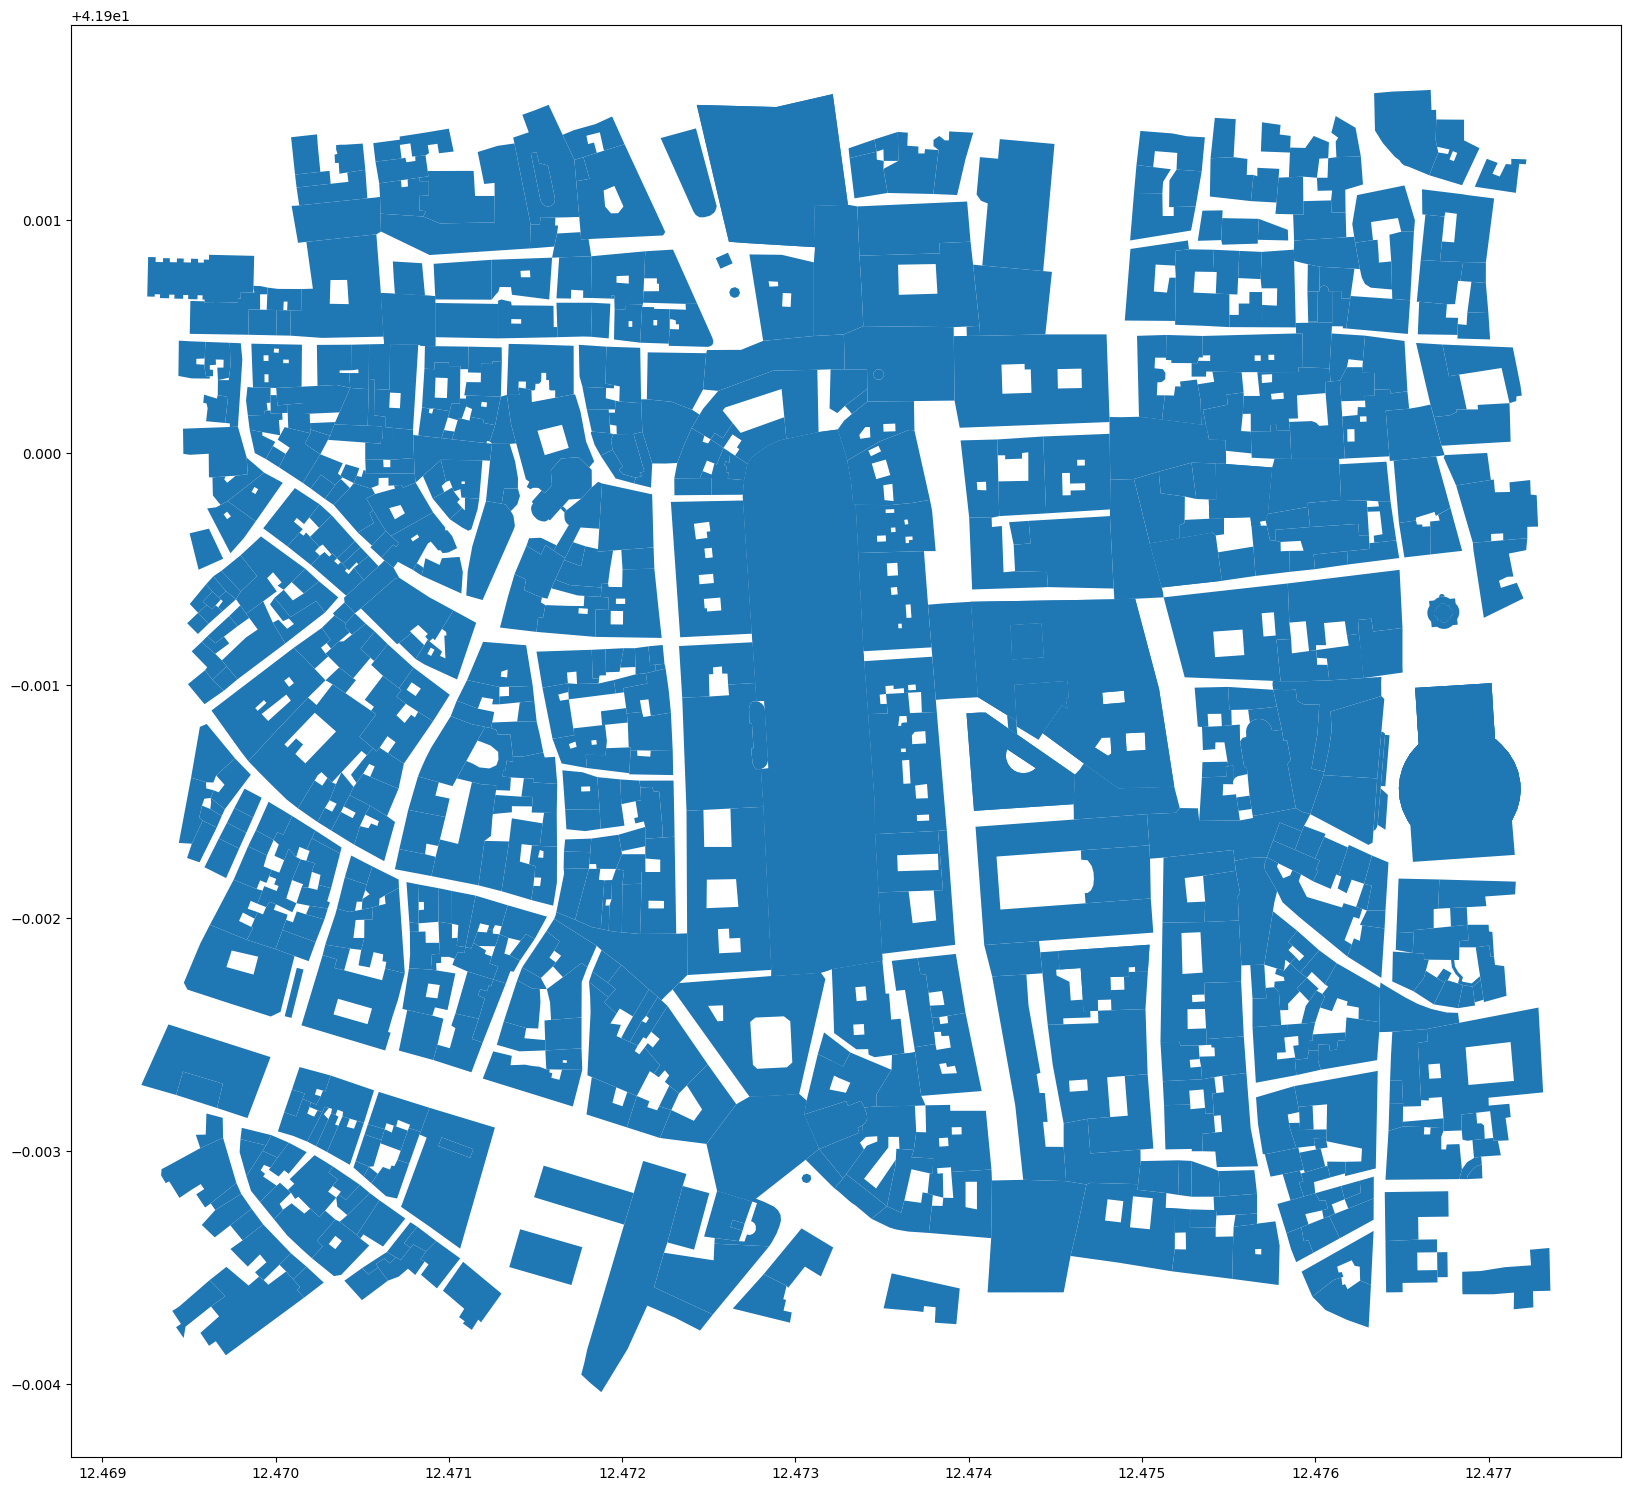

In [71]:
osm_area_gdf.plot(figsize=(20,20))

In [72]:
osm_area_gdf

type                                           geometry          id  \
0    area  MULTIPOLYGON (((12.47270 41.89981, 12.47270 41...     8494276   
1    area  MULTIPOLYGON (((12.47649 41.89856, 12.47649 41...    47681262   
2    area  MULTIPOLYGON (((12.47404 41.89839, 12.47404 41...    51221130   
3    area  MULTIPOLYGON (((12.47039 41.89938, 12.47040 41...    54892224   
4    area  MULTIPOLYGON (((12.47553 41.89825, 12.47554 41...    56318068   
..    ...                                                ...         ...   
728  area  MULTIPOLYGON (((12.47681 41.89986, 12.47691 41...  1937640152   
729  area  MULTIPOLYGON (((12.47424 41.89926, 12.47425 41...  1997823136   
730  area  MULTIPOLYGON (((12.47426 41.89900, 12.47428 41...  1998417072   
731  area  MULTIPOLYGON (((12.47254 41.90084, 12.47257 41...  2060835234   
732  area  MULTIPOLYGON (((12.47355 41.90031, 12.47358 41...  2305316696   

     version  visible                        ts       uid              user  \
0         64     True 2023-08-21 19:40:23+00:00  19233464  secondaryhighway   
1         48     True 2013-12-12 10:47:31+00:00    904963             ty000   
2         27     True 2023-09-20 14:05:07+00:00  12500589            tg4567   
3         12     True 2022-01-02 11:30:30+00:00     26139      dieterdreist   
4         21     True 2019-02-01 13:06:35+00:00   1595233          gnastyle   
..       ...      ...                       ...       ...               ...   
728        1     True 2021-07-30 14:12:39+00:00  13840457            SArbie   
729        2     True 2021-11-09 14:39:10+00:00  12969765           meinmap   
730        2     True 2021-11-09 14:39:10+00:00  12969765           meinmap   
731        1     True 2022-02-11 16:16:28+00:00    408226          andershl   
732        1     True 2023-03-08 11:45:18+00:00     26139      dieterdreist   

      changeet  tagLen                                               tags  
0    140198197      13  {'name': 'Piazza Navona', 'name:es': 'Plaza Na...  
1     19410566       3  {'building:part': 'yes', 'height': '28.3', 'ro...  
2    141515915       6  {'building': 'yes', 'building:levels': '4', 'n...  
3    115665193       6  {'area': 'yes', 'highway': 'pedestrian', 'lit'...  
4     66832785       4  {'area': 'yes', 'highway': 'pedestrian', 'lit'...  
..         ...     ...                                                ...  
728  108895808       3  {'building': 'yes', 'building:levels': '4', 'h...  
729  113568389       3  {'access': 'private', 'man_made': 'courtyard',...  
730  113568389       8  {'access': 'private', 'garden:type': 'private'...  
731  117293896       1                                {'building': 'yes'}  
732  133437379       2        {'building': 'yes', 'building:levels': '1'}  

[733 rows x 11 columns]

In [73]:
osm_area_gdf.tags[0].keys()

dict_keys(['name', 'name:es', 'name:it', 'name:ko', 'name:ru', 'name:zh', 'old_name', 'place', 'tourism', 'wheelchair', 'wikidata', 'wikimedia_commons', 'wikipedia'])

In [141]:
epsg=32633

In [74]:
a=osm_area_gdf.copy(deep=True)

In [75]:
a['buildinginfo']=a.tags.apply(lambda x:x['building'] if 'building' in x.keys() else 999)

In [76]:
a.buildinginfo.unique()

array([999, 'yes', 'church', 'basilica', 'apartments', 'residential',
       'school', 'retail', 'public', 'commercial', 'bridge', 'hotel',
       'temple', 'kiosk'], dtype=object)

In [143]:
a.to_crs(epsg,inplace=True)

In [136]:
len(a.buildinginfo.unique())

14

In [124]:
b=osm_node_gdf_.copy(deep=True)

In [125]:
b['amenity']=b.tags.apply(lambda x:x['amenity'] if 'amenity' in x.keys() else 999)

In [145]:
b_=b[b.amenity!=999]

In [146]:
b_.to_crs(epsg,inplace=True)

C:\Users\richie\anaconda3\envs\rl\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


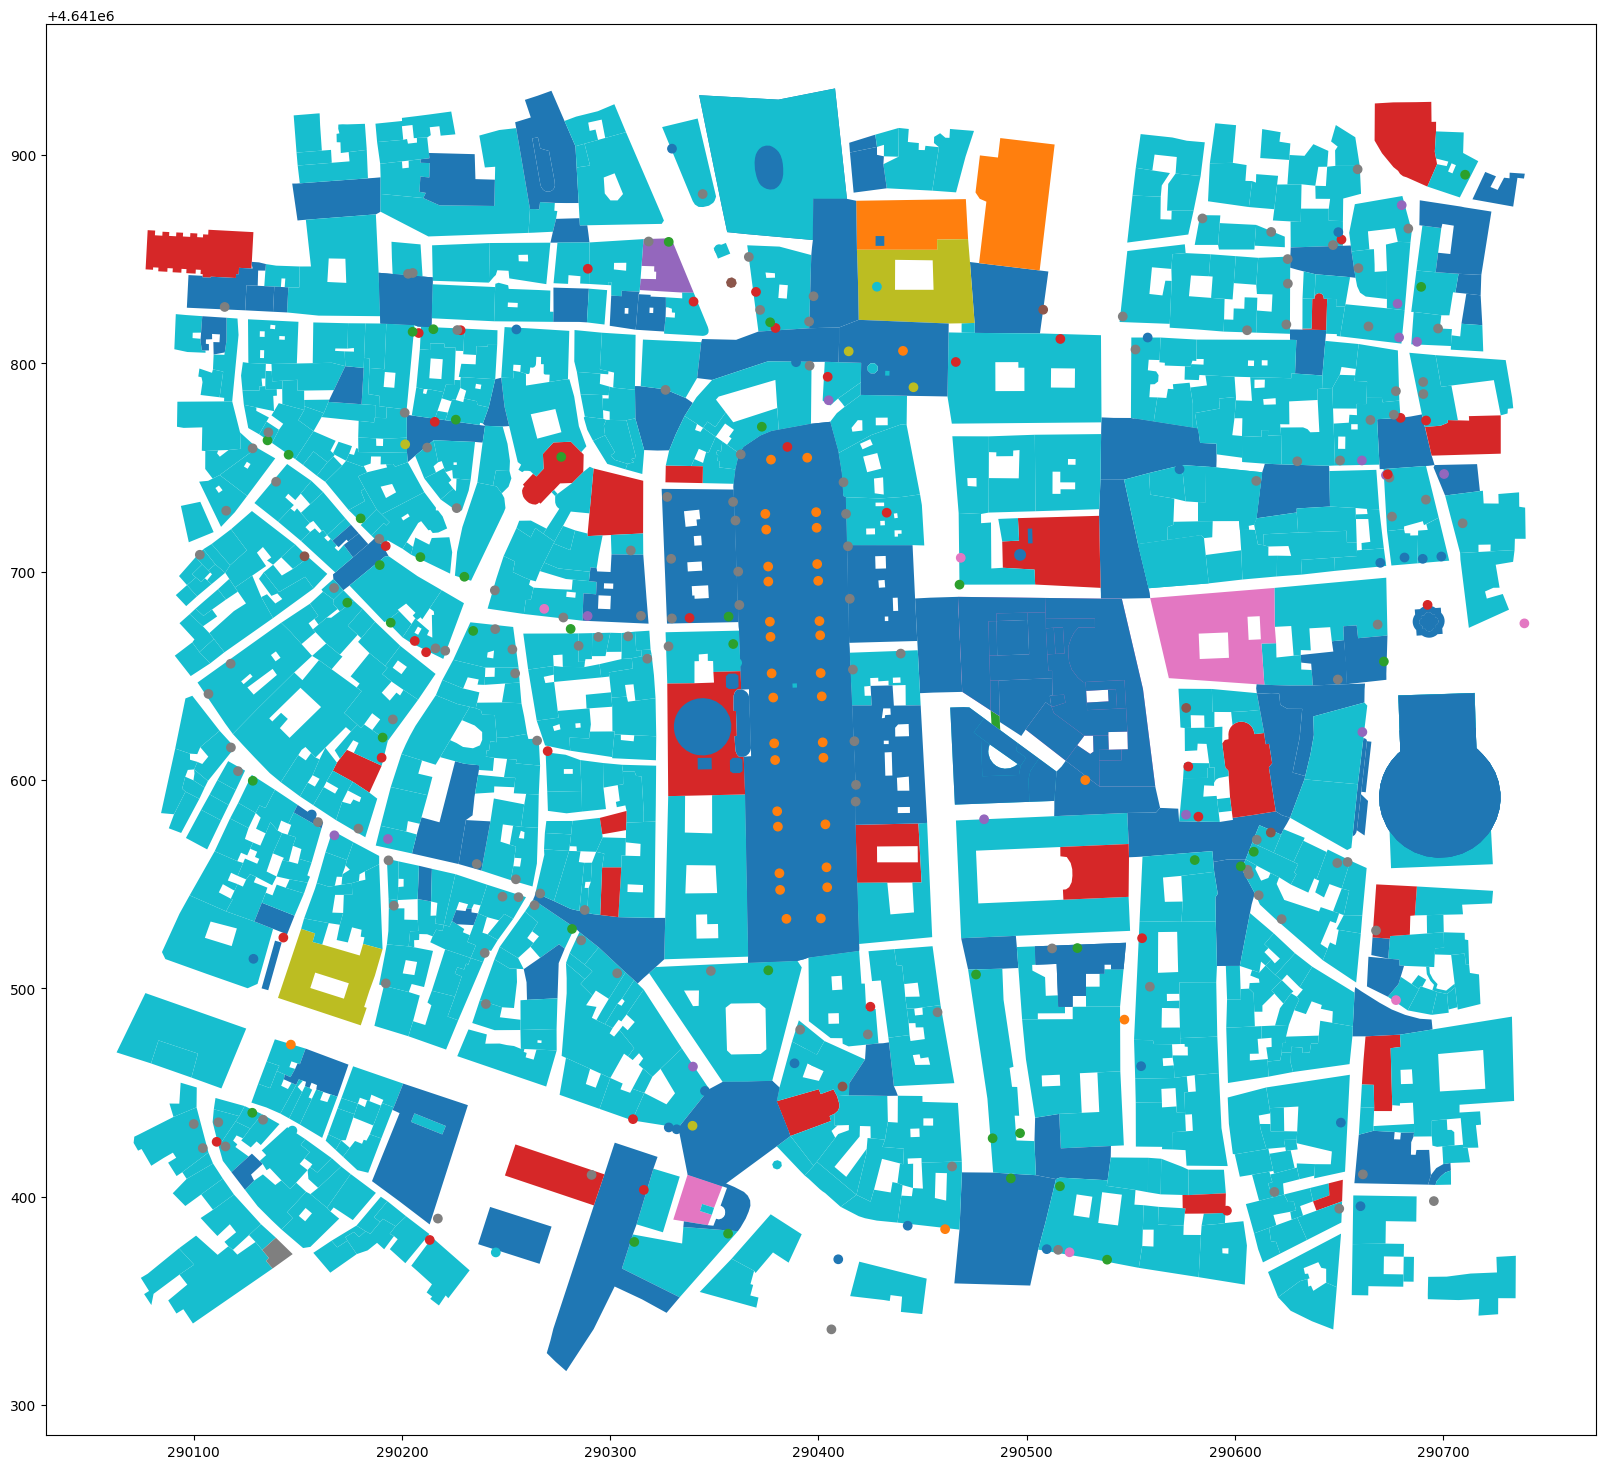

In [147]:
ax=a.plot(column='buildinginfo',figsize=(20,20))
b_.plot(column='amenity',ax=ax);

In [134]:
b_.amenity.unique()

array(['cafe', 'pharmacy', 'restaurant', 'bar', 'bureau_de_change',
       'bank', 'charging_station', 'drinking_water', 'atm', 'fast_food',
       'taxi', 'ice_cream', 'monastery', 'bench', 'fountain',
       'place_of_worship', 'bicycle_parking', 'clock', 'library',
       'toilets', 'vending_machine', 'pub', 'nightclub', 'theatre',
       'post_box', 'telephone', 'university', 'post_office', 'college'],
      dtype=object)

In [135]:
len(b_.amenity.unique())

29

In [150]:
print(a.crs,b_.crs)

EPSG:32633 EPSG:32633


In [164]:
a

type                                           geometry          id  \
0    area  MULTIPOLYGON (((290359.243 4641740.674, 290359...     8494276   
1    area  MULTIPOLYGON (((290669.458 4641593.029, 290669...    47681262   
2    area  MULTIPOLYGON (((290466.025 4641580.549, 290466...    51221130   
3    area  MULTIPOLYGON (((290166.923 4641698.691, 290167...    54892224   
4    area  MULTIPOLYGON (((290589.576 4641560.629, 290590...    56318068   
..    ...                                                ...         ...   
728  area  MULTIPOLYGON (((290700.883 4641736.569, 290708...  1937640152   
729  area  MULTIPOLYGON (((290485.551 4641676.295, 290485...  1997823136   
730  area  MULTIPOLYGON (((290486.561 4641647.748, 290487...  1998417072   
731  area  MULTIPOLYGON (((290349.674 4641855.448, 290351...  2060835234   
732  area  MULTIPOLYGON (((290432.025 4641794.175, 290434...  2305316696   

     version  visible                        ts       uid              user  \
0         64     True 2023-08-21 19:40:23+00:00  19233464  secondaryhighway   
1         48     True 2013-12-12 10:47:31+00:00    904963             ty000   
2         27     True 2023-09-20 14:05:07+00:00  12500589            tg4567   
3         12     True 2022-01-02 11:30:30+00:00     26139      dieterdreist   
4         21     True 2019-02-01 13:06:35+00:00   1595233          gnastyle   
..       ...      ...                       ...       ...               ...   
728        1     True 2021-07-30 14:12:39+00:00  13840457            SArbie   
729        2     True 2021-11-09 14:39:10+00:00  12969765           meinmap   
730        2     True 2021-11-09 14:39:10+00:00  12969765           meinmap   
731        1     True 2022-02-11 16:16:28+00:00    408226          andershl   
732        1     True 2023-03-08 11:45:18+00:00     26139      dieterdreist   

      changeet  tagLen                                               tags  \
0    140198197      13  {'name': 'Piazza Navona', 'name:es': 'Plaza Na...   
1     19410566       3  {'building:part': 'yes', 'height': '28.3', 'ro...   
2    141515915       6  {'building': 'yes', 'building:levels': '4', 'n...   
3    115665193       6  {'area': 'yes', 'highway': 'pedestrian', 'lit'...   
4     66832785       4  {'area': 'yes', 'highway': 'pedestrian', 'lit'...   
..         ...     ...                                                ...   
728  108895808       3  {'building': 'yes', 'building:levels': '4', 'h...   
729  113568389       3  {'access': 'private', 'man_made': 'courtyard',...   
730  113568389       8  {'access': 'private', 'garden:type': 'private'...   
731  117293896       1                                {'building': 'yes'}   
732  133437379       2        {'building': 'yes', 'building:levels': '1'}   

    buildinginfo  
0            999  
1            999  
2            yes  
3            999  
4            999  
..           ...  
728          yes  
729          999  
730          999  
731          yes  
732          yes  

[733 rows x 12 columns]

In [171]:
area_mapping=dict(enumerate(a.buildinginfo.unique()))
area_mapping={v:k for k,v in area_mapping.items()}
area_mapping

{999: 0,
 'yes': 1,
 'church': 2,
 'basilica': 3,
 'apartments': 4,
 'residential': 5,
 'school': 6,
 'retail': 7,
 'public': 8,
 'commercial': 9,
 'bridge': 10,
 'hotel': 11,
 'temple': 12,
 'kiosk': 13}

In [178]:
a['b_id']=a.buildinginfo.apply(lambda x:area_mapping[x])
a_=a[['geometry','b_id']]
a_.head()

geometry  b_id
0  MULTIPOLYGON (((290359.243 4641740.674, 290359...     0
1  MULTIPOLYGON (((290669.458 4641593.029, 290669...     0
2  MULTIPOLYGON (((290466.025 4641580.549, 290466...     1
3  MULTIPOLYGON (((290166.923 4641698.691, 290167...     0
4  MULTIPOLYGON (((290589.576 4641560.629, 290590...     0

In [181]:
node_mapping=dict(enumerate(b_.amenity.unique()))
node_mapping={v:k for k,v in node_mapping.items()}
node_mapping

{'cafe': 0,
 'pharmacy': 1,
 'restaurant': 2,
 'bar': 3,
 'bureau_de_change': 4,
 'bank': 5,
 'charging_station': 6,
 'drinking_water': 7,
 'atm': 8,
 'fast_food': 9,
 'taxi': 10,
 'ice_cream': 11,
 'monastery': 12,
 'bench': 13,
 'fountain': 14,
 'place_of_worship': 15,
 'bicycle_parking': 16,
 'clock': 17,
 'library': 18,
 'toilets': 19,
 'vending_machine': 20,
 'pub': 21,
 'nightclub': 22,
 'theatre': 23,
 'post_box': 24,
 'telephone': 25,
 'university': 26,
 'post_office': 27,
 'college': 28}

In [183]:
b_['amen_id']=b_.amenity.apply(lambda x:node_mapping[x])
b__=b_[['geometry','amen_id']]
b__.head()

geometry  amen_id
7292  POINT (290538.610 4641369.689)        0
6717  POINT (290520.572 4641373.243)        1
6958  POINT (290515.094 4641374.415)        2
5609  POINT (290509.623 4641374.743)        3
7022  POINT (290460.825 4641384.338)        4

In [184]:
import os
piazza_navona_shp_root=r'../data/piazza_navona_osm'

a_.to_file(os.path.join(piazza_navona_shp_root,'piazza_navona_osm_area.shp'))
b__.to_file(os.path.join(piazza_navona_shp_root,'piazza_navona_osm_node.shp'))

In [190]:
area_path=usda_geoproces.rasterize(os.path.join(piazza_navona_shp_root,'piazza_navona_osm_area.shp'),'b_id',cellSize=1,NoData_value=-9999,dtype='int32')
area_path                           

'C:\\Users\\richie\\AppData\\Local\\Temp\\tmpbwrubqu2.tif'

In [191]:
import shutil

shutil.copy(area_path, piazza_navona_shp_root)

'../data/piazza_navona_osm\\tmpbwrubqu2.tif'

In [196]:
node_path=usda_geoproces.rasterize(os.path.join(piazza_navona_shp_root,'piazza_navona_osm_node.shp'),'amen_id',cellSize=1,NoData_value=-9999,dtype='int32')
node_path  

'C:\\Users\\richie\\AppData\\Local\\Temp\\tmpqgb8zdnd.tif'

In [197]:
shutil.copy(node_path, piazza_navona_shp_root)

'../data/piazza_navona_osm\\tmpqgb8zdnd.tif'